In [4]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing import image
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing

In [66]:
model.save('Model')

INFO:tensorflow:Assets written to: Model\assets


In [5]:
model = load_model('Model')

In [2]:
base_csv_folder = 'Dataset/Csv/'
image_folder = 'Dataset/Images'
train_csv = os.path.join(base_csv_folder, 'train.csv')
test_csv = os.path.join(base_csv_folder, 'test.csv')
val_csv = os.path.join(base_csv_folder, 'val.csv')
x_train = y_train = []
x_test = y_test = []
x_val = y_val = []

for n, csv in enumerate([train_csv, test_csv, val_csv]):
    df = pd.read_csv(csv, names=['Frame', 'Label'])
    image_paths = df['Frame']
    labels = df['Label']
    temp_list = []
    for i in range(image_paths.shape[0]):
        img = image.load_img(image_folder + '/' + image_paths[i] + '.jpg', target_size=(150, 150, 3))
        img = image.img_to_array(img)
        img = img / 255
        temp_list.append(img)
    if n == 0:
        x_train = np.array(temp_list)
        y_train = np.array(labels)
    elif n == 1:
        x_test = np.array(temp_list)
        y_test = np.array(labels)
    else:
        x_val = np.array(temp_list)
        y_val = np.array(labels)

In [61]:
# Network definition
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))
#model.add(Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
#model.add(MaxPooling2D(pool_size=(3, 3)))
#model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.6))
#model.add(Dense(units=128, activation='relu'))
#model.add(Dropout(0.7))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
histogram = model.fit(x_train, y_train, epochs=20, validation_data=(x_val, y_val), batch_size=128)

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_38 (Conv2D)           (None, 146, 146, 32)      2432      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 48, 48, 32)        0         
_________________________________________________________________
dropout_57 (Dropout)         (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 44, 44, 64)        51264     
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_58 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 12544)           

In [62]:
result = model.evaluate(x_test, y_test)
print(f'Test accuracy: {result[1]} Test loss: {result[0]}')

3771/3771 [==============================] - 1s 305us/sample - loss: 0.4821 - accuracy: 0.8123
Test accuracy: 0.8122513890266418 Test loss: 0.4820880280430739


In [63]:
def plot_accuracy(histogram):
    epochs = range(1, len(histogram['accuracy']) + 1)
    plt.plot(epochs, histogram['accuracy'], 'green', label='Training accuracy')
    plt.plot(epochs, histogram['val_accuracy'], 'purple', label='Validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.plot()
    
def plot_loss(histogram):
    epochs = range(1, len(histogram['loss']) + 1)
    plt.plot(epochs, histogram['loss'], 'green', label='Training loss')
    plt.plot(epochs, histogram['val_loss'], 'purple', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.plot()

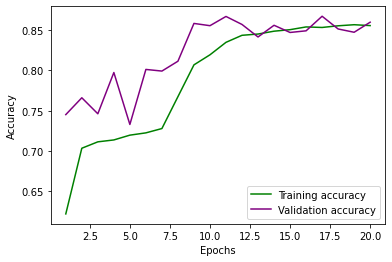

In [64]:
plot_accuracy(histogram.history)

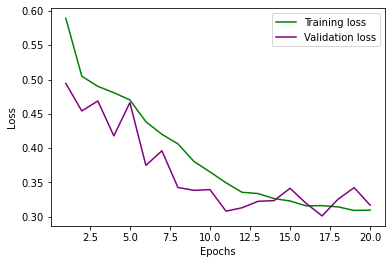

In [65]:
plot_loss(histogram.history)

In [18]:
def retrieve_best_frames(video, n):
    out_dir = 'Dataset/Test'
    video = cv2.VideoCapture(video_path)
    scores = []
    
    while video.isOpened():      
        rect, frame = video.read()
        if not rect:
            break     
        if len(frame[0] < len(frame[1])):
            frame = cv2.rotate(frame, cv2.ROTATE_90_CLOCKWISE)
        original_frame = frame
        frame = image.img_to_array(frame)
        frame = cv2.resize(frame, (150, 150)) 
        frame = frame / 255
        prob = model.predict(frame.reshape(1, 150, 150, 3))
        scores.append((original_frame, prob[0][0]))          
    video.release()
    cv2.destroyAllWindows()
    
    if scores is None or len(scores) == 0:
        return
    
    scores = sorted(scores, key=lambda tup: tup[1], reverse=True)
    for i in range(len(scores)):
        print(scores[i][1])
    for i in range(n):
        cv2.imwrite(os.path.join(str(i + 1) + '.jpg'), scores[i][0]) 

In [19]:
# video_path = 'Dataset/Videos/3 - Indoor flash - cooperative/3_008.mp4'
video_path = 'Test/1_001.mp4'
n = 50
retrieve_best_frames(video_path, n)

0.95791674
0.95771617
0.95546305
0.9522598
0.95097053
0.9491394
0.9482935
0.94755226
0.9343435
0.9332653
0.9265767
0.9239691
0.9201316
0.85941833
0.7549483
0.7048718
0.65760773
0.657043
0.6494225
0.64690036
0.64533544
0.63591367
0.63585
0.63473755
0.6214464
0.62088656
0.6167031
0.61040354
0.5982003
0.5901027
0.5726149
0.57122874
0.5564674
0.55328685
0.5485112
0.506163
0.48378894
0.47672498
0.4653779
0.45908406
0.45030236
0.44928348
0.44389063
0.43852243
0.42481855
0.41781366
0.41774246
0.40907413
0.40569216
0.40427306
0.39941147
0.39260665
0.39226085
0.38801047
0.38199738
0.38137963
0.37561
0.3735673
0.36627126
0.36365435
0.36006364
0.34876734
0.34876734
0.34876734
0.34876734
0.34876734
0.34876734
0.34876734
0.34876734
0.34876734
0.34579825
0.3047546
0.29992828
0.27599844
0.27574363
0.21263045
0.20036505
0.19799054
0.19772609
0.19515432
0.1933283
0.19325222
0.19100836
0.18724358
0.18613763
0.18551014
0.18339087
0.1833159
0.18048829
0.17806639
0.17749819
0.17677724
0.17170653
0.17090502